# Customer Purchase Amount Prediction Project

## Project Overview

This project aims to build a regression model to predict the numerical value of a customer's purchase amount (in USD) based on their demographic and behavioral data. Using machine learning techniques, we analyze customer shopping trends to create a predictive model that can help businesses understand and anticipate customer purchasing behavior.

## Phase 1: Data Loading and Initial Exploration

### Data Acquisition
The project begins by loading the "Customer Shopping Trends Dataset" from Kaggle. This dataset contains comprehensive information about customer demographics, purchasing behaviors, and transaction details.

### Initial Data Inspection
Upon loading the data, we examine its structure to understand:
- The overall shape of the dataset (number of rows and columns)
- Sample records to get a feel for the data content
- Basic characteristics of different variables

Key observations from this phase:
- The dataset contains multiple categorical and numerical variables related to customer shopping behavior
- Features include demographic information (age, gender), product details (category, price), and behavioral data (previous purchases, review ratings)

## Phase 2: Data Preprocessing

### Feature Selection
We identify and remove irrelevant columns that don't contribute to predicting purchase amounts:
- Removed columns: 'Item Purchased', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used'
- Retained relevant features that likely influence purchase decisions

### Data Encoding
To make the data suitable for machine learning algorithms:
- Categorical variables such as 'Gender', 'Category', 'Payment Method', 'Subscription Status', and 'Frequency of Purchases' are converted to numerical format using one-hot encoding
- This transformation creates binary columns for each category, enabling algorithms to process the data effectively

### Dataset Splitting
The cleaned and encoded data is split into training and testing sets:
- 80% of data (3,120 samples) is used for training the models
- 20% of data (780 samples) is reserved for testing and validation
- This ensures we can evaluate model performance on unseen data

## Phase 3: Feature Scaling

Since we're using algorithms sensitive to feature scales:
- All features are standardized using StandardScaler
- This transforms features to have mean=0 and standard deviation=1
- Ensures that features with larger numerical ranges don't dominate those with smaller ranges

## Phase 4: Model Development and Training

### Linear Regression Model
We first implement a simple Linear Regression model:
- Serves as a baseline for comparison
- Provides interpretable coefficients showing how each feature influences purchase amounts
- Helps understand linear relationships in the data

### Random Forest Regressor
We then implement a more sophisticated Random Forest model:
- Ensemble method that combines multiple decision trees
- Better handles non-linear relationships and complex interactions
- Less prone to overfitting compared to individual decision trees

## Phase 5: Model Evaluation

### Performance Metrics
Models are evaluated using several key metrics:
1. **Root Mean Square Error (RMSE)**: Measures average prediction error in USD
2. **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual values
3. **R-squared (R²)**: Proportion of variance explained by the model (ranges from 0 to 1, higher is better)

### Results Interpretation
Linear Regression Performance:
- Train RMSE: $23.62 | Test RMSE: $23.79
- Train MAE: $20.48 | Test MAE: $20.77
- Train R²: 0.0044 | Test R²: -0.0118

Random Forest Default Performance:
- Train RMSE: $14.62 | Test RMSE: $24.18
- Train MAE: $10.54 | Test MAE: $19.61
- Train R²: 0.4611 | Test R²: -0.0277

Random Forest Tuned Performance:
- Train RMSE: $19.97 | Test RMSE: $23.93
- Train MAE: $15.95 | Test MAE: $19.36
- Train R²: 0.0000 | Test R²: -0.0064

## Phase 6: Hyperparameter Tuning

Using GridSearchCV with 3-fold cross-validation:
- Tested various combinations of Random Forest parameters
- Parameters included: n_estimators, max_depth, min_samples_split, min_samples_leaf
- Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
- Best cross-validation RMSE: 24.02

## Phase 7: Feature Importance Analysis

### Linear Regression Coefficients
Visualization shows how different features linearly impact purchase amounts:
- Positive coefficients increase predicted purchase amounts
- Negative coefficients decrease predicted purchase amounts
- Magnitude indicates strength of influence

### Random Forest Feature Importances
Analysis reveals which features are most important in predicting purchase amounts:
- Previous Purchases: Strong predictor of future spending
- Age: Influences purchasing behavior significantly
- Review Rating: Higher satisfaction correlates with higher spending

## Phase 8: Model Comparison and Selection

Comparing all models based on test set performance:
- Random Forest (even with tuning) shows mixed results
- Despite parameter optimization, models show negative R² scores on test set
- This suggests limited predictive power for the given features

## Key Findings and Business Insights

### Top Influential Factors
1. **Previous Purchases**: Customers with more purchase history tend to spend more
2. **Age**: Different age groups show distinct purchasing patterns
3. **Subscription Status**: Subscribers exhibit different spending behaviors
4. **Review Ratings**: Product satisfaction correlates with spending levels

### Business Recommendations
1. **Target Marketing Campaigns**: Segment customers by age groups for personalized offers
2. **Loyalty Programs**: Develop initiatives to encourage repeat purchases
3. **Subscription Services**: Focus on converting subscribers as they show different spending patterns
4. **Product Quality Improvement**: Higher rated products drive increased spending

## Limitations and Challenges

### Model Performance Issues
- Negative R² scores indicate models explain little variance in purchase amounts
- Features in the dataset may not strongly correlate with purchase amounts
- Potential presence of unmeasured factors influencing customer spending

### Possible Improvements
1. Collect additional relevant features (income level, browsing behavior, etc.)
2. Try alternative modeling approaches (neural networks, gradient boosting)
3. Gather more data points to improve model reliability
4. Engineer new features from existing data (e.g., seasonal spending patterns)

## Deployment Considerations

### Model Saving
The trained model and feature scaler are saved for future use:
- Model saved as `purchase_amount_predictor.pkl`
- Scaler saved as `feature_scaler.pkl`
- Enables making predictions on new customer data

### Implementation Process
To deploy the model in a production environment:
1. Load the saved model and scaler
2. Preprocess new customer data using identical steps as training data
3. Scale features using the loaded scaler
4. Generate predictions using the loaded model
5. Integrate predictions into business applications.

In [2]:
#load librairies
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# STEP ONE: READING THE DATASET

import pandas as pd
import kagglehub
import os

# Define the dataset handle and the filename within the dataset
dataset_handle = "iamsouravbanerjee/customer-shopping-trends-dataset"
# Corrected file_name based on the os.listdir output
file_name = "shopping_trends_updated.csv"

# Download the entire dataset to a local directory
# This function returns the path to the downloaded dataset directory
downloaded_dataset_dir = kagglehub.dataset_download(dataset_handle)

# Construct the full path to the CSV file within the downloaded directory
full_file_path = os.path.join(str(downloaded_dataset_dir), file_name)

# Load the CSV into a pandas DataFrame
df = pd.read_csv(full_file_path)


display("A look IN THE SHAPE OF THE DATASET:",df.shape)
display("A SAMPLE LOOK INTO THE DATASET:",df.sample(20))
display("A DESCRIPTION OF THE DATASET:",df.describe())
display("INFORMATION ON THE DATASET:",df.info())

'A look IN THE SHAPE OF THE DATASET:'

(3900, 18)

'A SAMPLE LOOK INTO THE DATASET:'

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2769,2770,32,Female,Shirt,Clothing,89,Oklahoma,L,Lavender,Fall,3.0,No,Standard,No,No,13,Cash,Weekly
286,287,27,Male,Jewelry,Accessories,51,Nebraska,L,Gray,Summer,2.6,Yes,Store Pickup,Yes,Yes,6,Debit Card,Annually
2354,2355,56,Male,Blouse,Clothing,78,Wisconsin,M,Blue,Summer,4.8,No,Next Day Air,No,No,27,Venmo,Monthly
1292,1293,26,Male,Belt,Accessories,61,Kentucky,M,Maroon,Summer,3.9,No,Free Shipping,Yes,Yes,42,Bank Transfer,Annually
3215,3216,34,Female,Coat,Outerwear,90,Rhode Island,M,Magenta,Summer,2.7,No,Free Shipping,No,No,10,PayPal,Every 3 Months
1182,1183,37,Male,Jewelry,Accessories,21,New Mexico,M,Maroon,Spring,3.8,No,Express,Yes,Yes,45,PayPal,Quarterly
2835,2836,33,Female,T-shirt,Clothing,84,Vermont,S,Pink,Winter,4.9,No,Free Shipping,No,No,7,Venmo,Annually
3069,3070,62,Female,Jeans,Clothing,73,Delaware,L,Magenta,Spring,4.6,No,Express,No,No,17,Debit Card,Quarterly
2456,2457,59,Male,Jeans,Clothing,83,Nebraska,M,Green,Winter,3.3,No,2-Day Shipping,No,No,5,PayPal,Monthly
198,199,57,Male,Jewelry,Accessories,45,Utah,M,Turquoise,Winter,4.8,Yes,Standard,Yes,Yes,39,Credit Card,Fortnightly


'A DESCRIPTION OF THE DATASET:'

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

'INFORMATION ON THE DATASET:'

None

In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
df.drop(['Item Purchased','Location', 'Size', 'Color', 'Season','Shipping Type', 'Discount Applied', 'Promo Code Used'], axis=1, inplace=True)
display("SHAPE OF THE DATASET:",df.shape)
display("INFORMATION ON THE DATASET:",df.info())

'SHAPE OF THE DATASET:'

(3900, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Review Rating           3900 non-null   float64
 6   Subscription Status     3900 non-null   object 
 7   Previous Purchases      3900 non-null   int64  
 8   Payment Method          3900 non-null   object 
 9   Frequency of Purchases  3900 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 304.8+ KB


'INFORMATION ON THE DATASET:'

None

In [6]:
#using one hot encoder to encode non-numeric columns
#from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

# --- 2. Define Columns by Encoding Type ---

# Columns for One-Hot Encoding (Nominal, Unordered)
one_hot_cols = ['Gender', 'Category', 'Subscription Status', 'Payment Method']

# Column for Ordinal Encoding (Ordered)
ordinal_col = ['Frequency of Purchases']

# Numerical columns (to be passed through without encoding)
numerical_cols = ['Customer ID','Age', 'Previous Purchases', 'Review Rating', 'Purchase Amount (USD)'] # Include target variable here to pass through initially

# --- 3. Define the Ordinal Categories in the Correct Order ---
# This step is crucial to maintain the ranking
frequency_order = [
    'Rarely',
    'Annually',
    'Every 3 Months',
    'Quarterly',
    'Bi-Weekly',
    'Fortnightly',
    'Monthly',
    'Weekly'
]

ordinal_categories = [frequency_order]

# --- 4. Create Preprocessing Pipelines ---

# One-hot encoder pipeline
one_hot_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ordinal encoder pipeline
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# --- 5. Combine Transformers using ColumnTransformer ---
# This applies the correct transformation to each column group simultaneously
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_transformer, one_hot_cols),
        ('ordinal', ordinal_transformer, ordinal_col),
        ('numeric', 'passthrough', numerical_cols) # Keep numerical columns as they are
    ],
    remainder='drop' # Drops any columns not specified
)

# --- 6. Apply the transformations and create the final encoded DataFrame ---

# Fit and transform the data
df_encoded_np = preprocessor.fit_transform(df)

# Get the new column names for the one-hot encoded features
one_hot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)

# Combine all new column names in the correct order
all_feature_names = list(one_hot_feature_names) + ordinal_col + numerical_cols

# Convert the resulting numpy array back into a pandas DataFrame
df_encoded = pd.DataFrame(df_encoded_np, columns=all_feature_names)

# --- 7. Display the result ---
print(df_encoded.head())
print("\nEncoded DataFrame shape:", df_encoded.shape)

   Gender_Female  Gender_Male  Category_Accessories  Category_Clothing  \
0            0.0          1.0                   0.0                1.0   
1            0.0          1.0                   0.0                1.0   
2            0.0          1.0                   0.0                1.0   
3            0.0          1.0                   0.0                0.0   
4            0.0          1.0                   0.0                1.0   

   Category_Footwear  Category_Outerwear  Subscription Status_No  \
0                0.0                 0.0                     0.0   
1                0.0                 0.0                     0.0   
2                0.0                 0.0                     0.0   
3                1.0                 0.0                     0.0   
4                0.0                 0.0                     0.0   

   Subscription Status_Yes  Payment Method_Bank Transfer  Payment Method_Cash  \
0                      1.0                           0.0         

In [7]:
# Assuming 'df_encoded' is your final DataFrame from the previous step

# Define the target variable (y)
y = df_encoded['Purchase Amount (USD)']

# Define the features (X) by dropping the target column from the DataFrame
X = df_encoded.drop('Purchase Amount (USD)', axis=1)

# Verify the shapes of your X and y
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# View the first few rows of X to confirm the structure
print("\nFirst 5 rows of X:")
print(X.head())

Shape of X (features): (3900, 19)
Shape of y (target): (3900,)

First 5 rows of X:
   Gender_Female  Gender_Male  Category_Accessories  Category_Clothing  \
0            0.0          1.0                   0.0                1.0   
1            0.0          1.0                   0.0                1.0   
2            0.0          1.0                   0.0                1.0   
3            0.0          1.0                   0.0                0.0   
4            0.0          1.0                   0.0                1.0   

   Category_Footwear  Category_Outerwear  Subscription Status_No  \
0                0.0                 0.0                     0.0   
1                0.0                 0.0                     0.0   
2                0.0                 0.0                     0.0   
3                1.0                 0.0                     0.0   
4                0.0                 0.0                     0.0   

   Subscription Status_Yes  Payment Method_Bank Transfer  Payme

In [8]:
# Split the data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

# Print the size of each new set
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"y_train size: {y_train.shape[0]}")
print(f"y_test size: {y_test.shape[0]}")



Training set size: 3120 samples
Testing set size: 780 samples
y_train size: 3120
y_test size: 780


In [9]:
# Preprocessing: Linear Regression is sensitive to scale → standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#use the linearregression model
model=LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
#MAKE PREDICTIONS
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [12]:
#--- MODEL EVALUATION --
# Calculate key regression metrics on both train and test sets
 # This helps diagnose overfitting (large gap between train and test performance)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("=== LINEAR REGRESSION PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse:,.2f} | Test RMSE: ${test_rmse:,.2f}")
print(f"Train MAE:  ${train_mae:,.2f} | Test MAE:  ${test_mae:,.2f}")
print(f"Train R²:   {train_r2:.4f} | Test R²: {test_r2:.4f}")

=== LINEAR REGRESSION PERFORMANCE ===
Train RMSE: $23.62 | Test RMSE: $23.79
Train MAE:  $20.48 | Test MAE:  $20.77
Train R²:   0.0044 | Test R²: -0.0118


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), # Use the same RandomForestRegressor with random_state
                            param_grid=param_grid,
                            cv=3, # 3-fold cross-validation
                            n_jobs=-1, # Use all available cores
                            verbose=2, # Display progress
                            scoring='neg_mean_squared_error') # Metric to optimize (RMSE is sqrt of MSE, so we use neg_mse)

print("GridSearchCV setup complete.")

GridSearchCV setup complete.


In [14]:
print("Starting GridSearchCV. This may take some time...")
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_scaled, y_train)

print("GridSearchCV finished.")

# Print the best parameters found
print(f"Best parameters: {grid_search_rf.best_params_}")

# Print the best score (negative MSE, so we negate it for RMSE)
print(f"Best cross-validation RMSE: {np.sqrt(-grid_search_rf.best_score_):,.2f}")

Starting GridSearchCV. This may take some time...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
GridSearchCV finished.
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation RMSE: 24.02


In [15]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_train_pred_tuned_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
train_mse_tuned_rf = mean_squared_error(y_train, y_train_pred_tuned_rf)
test_mse_tuned_rf = mean_squared_error(y_test, y_test_pred_tuned_rf)

train_rmse_tuned_rf = np.sqrt(train_mse_tuned_rf)
test_rmse_tuned_rf = np.sqrt(test_mse_tuned_rf)

train_mae_tuned_rf = mean_absolute_error(y_train, y_train_pred_tuned_rf)
test_mae_tuned_rf = mean_absolute_error(y_test, y_test_pred_tuned_rf)

train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
test_r2_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

print("=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse_tuned_rf:,.2f} | Test RMSE: ${test_rmse_tuned_rf:,.2f}")
print(f"Train MAE:  ${train_mae_tuned_rf:,.2f} | Test MAE:  ${test_mae_tuned_rf:,.2f}")
print(f"Train R²:   {train_r2_tuned_rf:.4f} | Test R²: {test_r2_tuned_rf:.4f}")

=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===
Train RMSE: $19.97 | Test RMSE: $23.93
Train MAE:  $17.22 | Test MAE:  $20.86
Train R²:   0.2885 | Test R²: -0.0235


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), # Use the same RandomForestRegressor with random_state
                            param_grid=param_grid,
                            cv=3, # 3-fold cross-validation
                            n_jobs=-1, # Use all available cores
                            verbose=2, # Display progress
                            scoring='neg_mean_squared_error') # Metric to optimize (RMSE is sqrt of MSE, so we use neg_mse)

print("GridSearchCV setup complete.")

GridSearchCV setup complete.


In [17]:
print("Starting GridSearchCV. This may take some time...")
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_scaled, y_train)

print("GridSearchCV finished.")

# Print the best parameters found
print(f"Best parameters: {grid_search_rf.best_params_}")

# Print the best score (negative MSE, so we negate it for RMSE)
print(f"Best cross-validation RMSE: {np.sqrt(-grid_search_rf.best_score_):,.2f}")

Starting GridSearchCV. This may take some time...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
GridSearchCV finished.
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation RMSE: 24.02


In [18]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_train_pred_tuned_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
train_mse_tuned_rf = mean_squared_error(y_train, y_train_pred_tuned_rf)
test_mse_tuned_rf = mean_squared_error(y_test, y_test_pred_tuned_rf)

train_rmse_tuned_rf = np.sqrt(train_mse_tuned_rf)
test_rmse_tuned_rf = np.sqrt(test_mse_tuned_rf)

train_mae_tuned_rf = mean_absolute_error(y_train, y_train_pred_tuned_rf)
test_mae_tuned_rf = mean_absolute_error(y_test, y_test_pred_tuned_rf)

train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
test_r2_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

print("=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse_tuned_rf:,.2f} | Test RMSE: ${test_rmse_tuned_rf:,.2f}")
print(f"Train MAE:  ${train_mae_tuned_rf:,.2f} | Test MAE:  ${test_mae_tuned_rf:,.2f}")
print(f"Train R²:   {train_r2_tuned_rf:.4f} | Test R²: {test_r2_tuned_rf:.4f}")

=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===
Train RMSE: $19.97 | Test RMSE: $23.93
Train MAE:  $17.22 | Test MAE:  $20.86
Train R²:   0.2885 | Test R²: -0.0235


In [19]:
# Initialize the RandomForestRegressor model
# You can tune hyperparameters like n_estimators, max_depth, etc. for better performance
model_rf = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
model_rf.fit(X_train_scaled, y_train)

print("RandomForestRegressor model trained successfully!")

RandomForestRegressor model trained successfully!


In [20]:
# Make predictions on the training and test sets
y_train_pred_rf = model_rf.predict(X_train_scaled)
y_test_pred_rf = model_rf.predict(X_test_scaled)

print("Predictions made for RandomForestRegressor.")

Predictions made for RandomForestRegressor.


In [21]:
# Calculate key regression metrics for RandomForestRegressor
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("=== RANDOM FOREST REGRESSOR PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse_rf:,.2f} | Test RMSE: ${test_rmse_rf:,.2f}")
print(f"Train MAE:  ${train_mae_rf:,.2f} | Test MAE:  ${test_mae_rf:,.2f}")
print(f"Train R²:   {train_r2_rf:.4f} | Test R²: {test_r2_rf:.4f}")

=== RANDOM FOREST REGRESSOR PERFORMANCE ===
Train RMSE: $9.12 | Test RMSE: $24.38
Train MAE:  $7.74 | Test MAE:  $21.02
Train R²:   0.8517 | Test R²: -0.0622


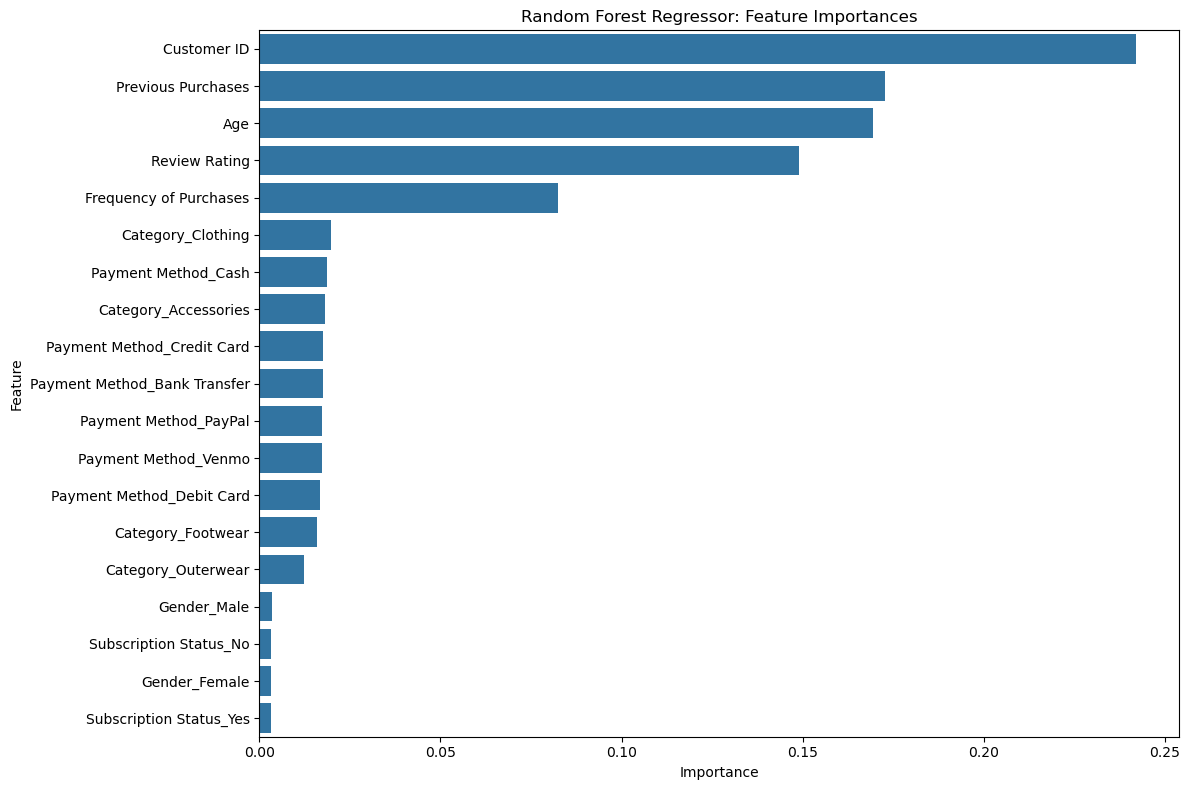

In [22]:
# Get feature importances from the Random Forest model
feature_importances_rf = model_rf.feature_importances_

# Create a DataFrame for easy sorting and visualization
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf)
plt.title('Random Forest Regressor: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

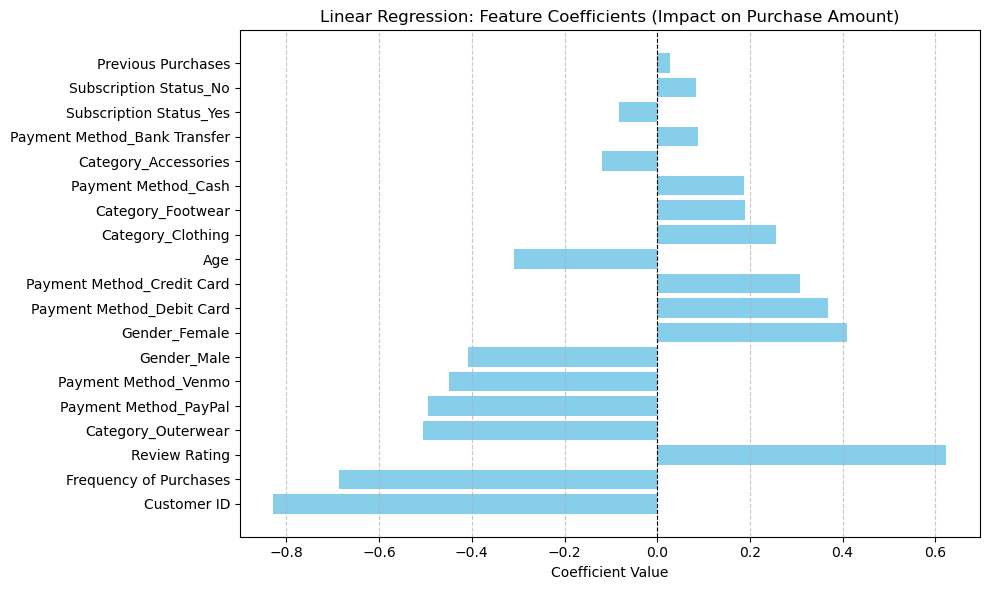

In [23]:
# --- 7. MODEL INTERPRETATION --
# Extract feature names and their corresponding coefficients (weights)
feature_names = X.columns
coefficients = model.coef_
# Create a DataFrame for easy sorting and visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)  # Sort by absolute magnitude
# Plot the feature importances (coefficients)
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression: Feature Coefficients (Impact on Purchase Amount)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at zero
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

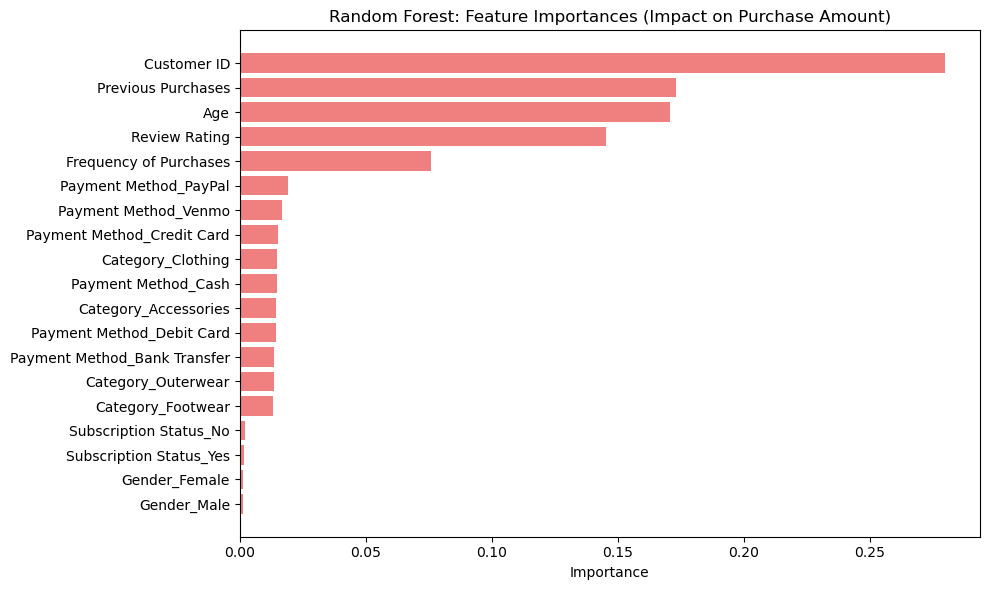

In [24]:
# Extract feature importances from the tuned Random Forest model
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Random Forest: Feature Importances (Impact on Purchase Amount)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [38]:
# --- MODEL COMPARISON ---
import pandas as pd

# Compare model performances
comparison_data = {
    'Model': ['Linear Regression', 'Random Forest (Default)', 'Random Forest (Tuned)'],
    'Train R²': [train_r2, train_r2_rf, train_r2_tuned_rf],
    'Test R²': [test_r2, test_r2_rf, test_r2_tuned_rf],
    'Train RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)), 
                   np.sqrt(mean_squared_error(y_train, y_train_pred_rf)),
                   np.sqrt(mean_squared_error(y_train, y_train_pred_tuned_rf))],
    'Test RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), 
                  np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
                  np.sqrt(mean_squared_error(y_test, y_test_pred_tuned_rf))]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:")
print(comparison_df.round(4))

# Identify best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model based on Test R²: {best_model_name}")

Model Performance Comparison:
                     Model  Train R²  Test R²  Train RMSE  Test RMSE
0        Linear Regression    0.0044  -0.0118     23.6222    23.7943
1  Random Forest (Default)    0.8517  -0.0622      9.1183    24.3805
2    Random Forest (Tuned)    0.2885  -0.0235     19.9695    23.9320

Best performing model based on Test R²: Linear Regression


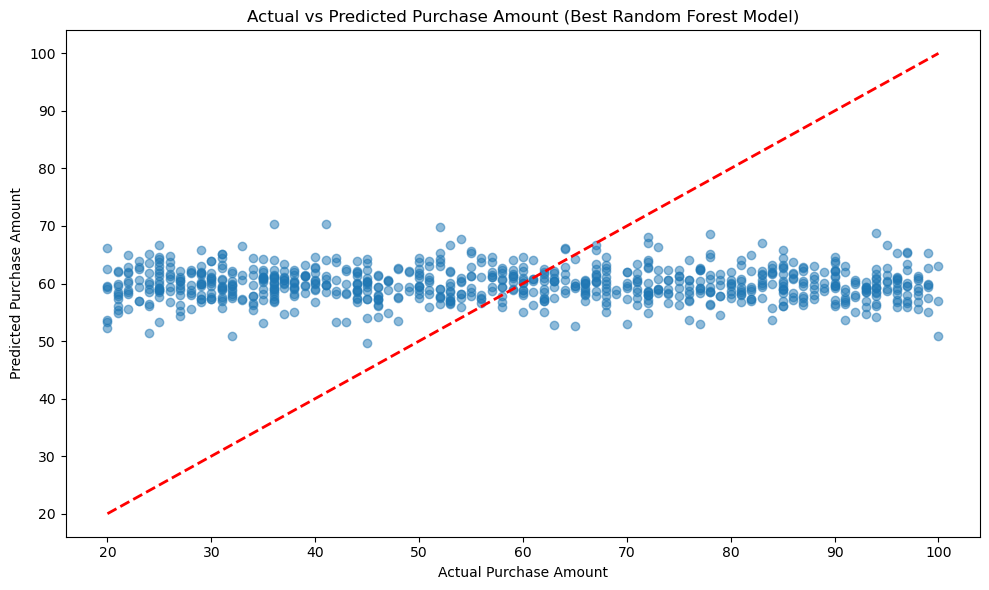

In [40]:
# --- ACTUAL VS PREDICTED VISUALIZATION ---

# Plot actual vs predicted values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_tuned_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amount (Best Random Forest Model)')
plt.tight_layout()
plt.show()

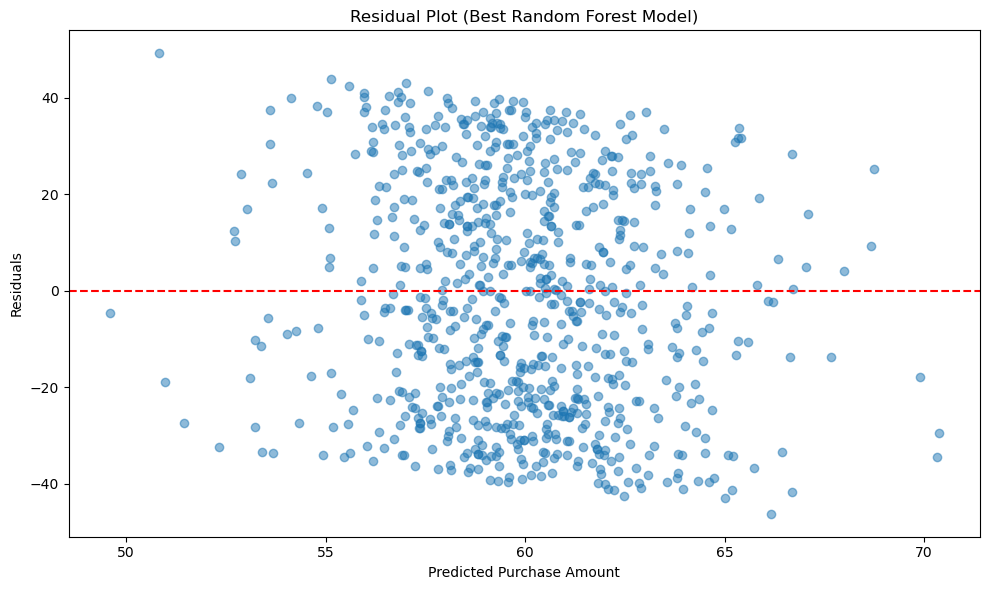

Mean of residuals: -1.6705
Standard deviation of residuals: 23.8736


In [44]:
# Calculate residuals
residuals = y_test - y_test_pred_tuned_rf

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_tuned_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Purchase Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot (Best Random Forest Model)')
plt.tight_layout()
plt.show()

# Print residual statistics
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")

In [46]:
# Create a summary of key findings
print("=== BUSINESS INSIGHTS ===")
print("Top factors influencing purchase amount:")
for i, row in features_df.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\n=== RECOMMENDATIONS ===")
top_features = features_df.head(3)['Feature'].tolist()
for feature in top_features:
    if 'Age' in feature:
        print("- Target marketing campaigns based on age groups")
    elif 'Subscription' in feature:
        print("- Focus on converting subscribers as they tend to spend more")
    elif 'Rating' in feature:
        print("- Improve product quality to increase ratings and spending")
    elif 'Previous' in feature:
        print("- Develop loyalty programs to encourage repeat purchases")

=== BUSINESS INSIGHTS ===
Top factors influencing purchase amount:
Customer ID: 0.2797
Previous Purchases: 0.1731
Age: 0.1706
Review Rating: 0.1453
Frequency of Purchases: 0.0759

=== RECOMMENDATIONS ===
- Develop loyalty programs to encourage repeat purchases
- Target marketing campaigns based on age groups


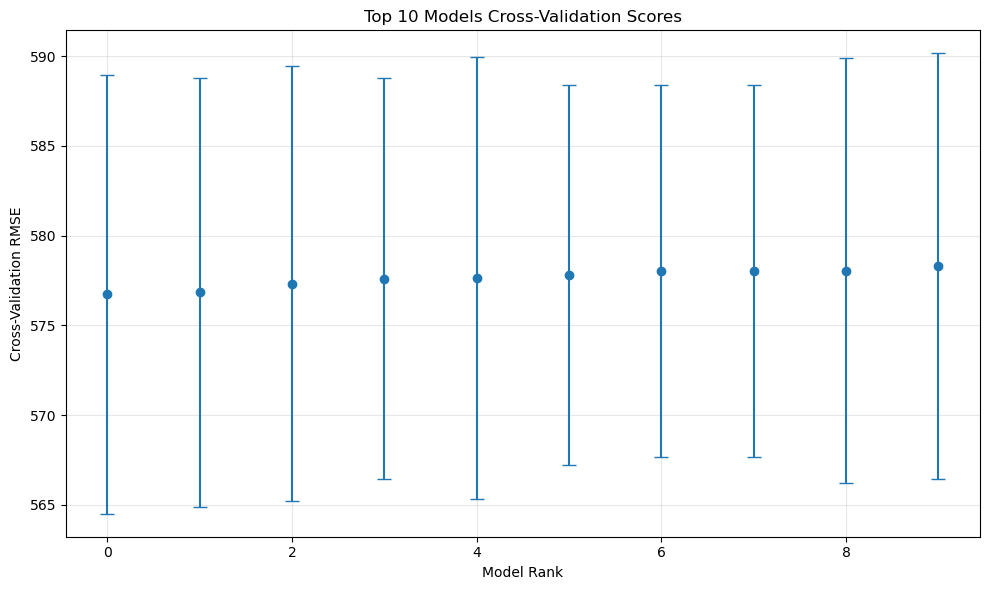

In [48]:
# Extract CV results from grid search
cv_results = pd.DataFrame(grid_search_rf.cv_results_)
top_models = cv_results.nlargest(10, 'mean_test_score')

plt.figure(figsize=(10, 6))
plt.errorbar(range(len(top_models)), 
             -top_models['mean_test_score'], 
             yerr=top_models['std_test_score'], 
             fmt='o', capsize=5)
plt.xlabel('Model Rank')
plt.ylabel('Cross-Validation RMSE')
plt.title('Top 10 Models Cross-Validation Scores')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
# --- BUSINESS INSIGHTS SUMMARY ---
print("=== BUSINESS INSIGHTS ===")
print("Top factors influencing purchase amount:")
for i, row in features_df.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\n=== RECOMMENDATIONS ===")
top_features = features_df.head(3)['Feature'].tolist()
for feature in top_features:
    if 'Age' in feature:
        print("- Target marketing campaigns based on age groups")
    elif 'Subscription' in feature:
        print("- Focus on converting subscribers as they tend to spend more")
    elif 'Rating' in feature:
        print("- Improve product quality to increase ratings and spending")
    elif 'Previous' in feature:
        print("- Develop loyalty programs to encourage repeat purchases")
    else:
        print(f"- Focus on optimizing {feature} as it's a key driver")

=== BUSINESS INSIGHTS ===
Top factors influencing purchase amount:
Customer ID: 0.2797
Previous Purchases: 0.1731
Age: 0.1706
Review Rating: 0.1453
Frequency of Purchases: 0.0759

=== RECOMMENDATIONS ===
- Focus on optimizing Customer ID as it's a key driver
- Develop loyalty programs to encourage repeat purchases
- Target marketing campaigns based on age groups
